In [14]:
# importación de librerias
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split # función de construcción train-test
from sklearn.tree import DecisionTreeClassifier # clasificador decision tree

from sklearn import metrics
from sklearn import tree

In [3]:
# lectura de datasets
df = pd.read_csv('../data/raw/train.csv')
df_predict = pd.read_csv('../data/raw/test.csv')

In [4]:
# seleccion de features y construcción de train-test
target = "Survived"
feature = "Pclass"
features = df.columns[[2]]
X = df.loc[:, features]
y = df[target]

# construcción de conjunto train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [5]:
# construccion de clasificador. Entrenamiento del modelo
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [6]:
# testeo del modelo
y_pred = model.predict(X_test)

In [7]:
# validación del modelo: accuracy
metrics.accuracy_score(y_test, y_pred)

0.6604477611940298

In [8]:
metrics.confusion_matrix(y_pred, y_test)
# sobrevive = 1, muere = 0, positivo = sobrevive; true-negative = 129

array([[129,  67],
       [ 24,  48]])

In [9]:
# generación del modelo
modelo_final = DecisionTreeClassifier()
modelo_final = modelo_final.fit(X,y)

In [10]:
X_predict = df_predict.loc[:, features]
y_final = modelo_final.predict(X_predict)
df_predict["Survived"] = y_final
df_final = df_predict[["PassengerId", "Survived"]]

In [11]:
# output
df_final.to_csv('../output/20201118_002_decision_tree_basico.csv', index = False)

[Text(200.88000000000002, 181.2, 'X[0] <= 2.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 1.5\ngini = 0.493\nsamples = 400\nvalue = [177, 223]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.466\nsamples = 216\nvalue = [80, 136]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.499\nsamples = 184\nvalue = [97, 87]'),
 Text(267.84000000000003, 108.72, 'gini = 0.367\nsamples = 491\nvalue = [372, 119]')]

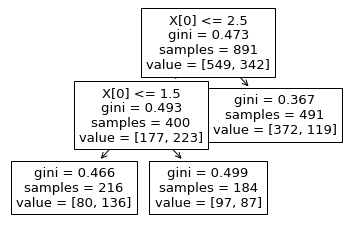

In [24]:
# visualización del árbol construido
tree.plot_tree(modelo_final)

# Observaciones: 

1. El método DecisionTreeClassifier() no soporta missing values.
2. Tenemos tres funciones de predicción clave: predict(), predict_proba() y predict_log_proba().

In [23]:
y_pred_prob = modelo_final.predict_proba(X_predict)


[[0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.52717391 0.47282609]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.52717391 0.47282609]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.37037037 0.62962963]
 [0.37037037 0.62962963]
 [0.52717391 0.47282609]
 [0.37037037 0.62962963]
 [0.52717391 0.47282609]
 [0.52717391 0.47282609]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.37037037 0.62962963]
 [0.75763747 0.24236253]
 [0.37037037 0.62962963]
 [0.37037037 0.62962963]
 [0.37037037 0.62962963]
 [0.75763747 0.24236253]
 [0.37037037 0.62962963]
 [0.75763747 0.24236253]
 [0.37037037 0.62962963]
 [0.75763747 0.24236253]
 [0.52717391 0.47282609]
 [0.52717391 0.47282609]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.37037037 0.62962963]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]
 [0.75763747 0.24236253]


In [22]:
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
X                        DataFrame                      Pclass\n0         3\<...>n\n[891 rows x 1 columns]
X_predict                DataFrame                      Pclass\n0         3\<...>n\n[418 rows x 1 columns]
X_test                   DataFrame                      Pclass\n862       1\<...>n\n[268 rows x 1 columns]
X_train                  DataFrame                      Pclass\n114       3\<...>n\n[623 rows x 1 columns]
df                       DataFrame                      PassengerId  Survive<...>\n[891 rows x 12 columns]
df_final                 DataFrame                      PassengerId  Survive<...>n\n[418 rows x 2 columns]
df_predict               DataFrame                      PassengerId  Pclass <...>\n[418 rows x 12 columns]
feature               

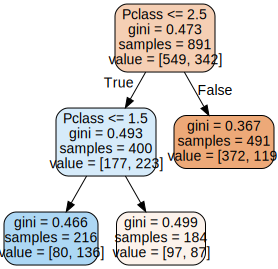

In [39]:
import graphviz
aux1 = tree.export_graphviz(modelo_final, out_file=None, filled=True, rounded=True, feature_names= ["Pclass"])
graf = graphviz.Source(aux1)
graf.render("../work/arbol002") # exporta a pdf
graf

AttributeError: 'DataFrame' object has no attribute 'feature_names'